# PS.2 (inner product is backwards stable)
Consider 
\begin{equation*}
		f,\tilde{f}:\mathbb{R}^2\times \mathbb{R}^2\rightarrow\mathbb{R}, \qquad f(x,y)=\langle x,y\rangle,\qquad \tilde{f}(x,y)= \bigoplus_{k=1}^2 (x_k\odot 		y_k).
	\end{equation*}

a) Verify that $\tilde{f}$ is partially backwards stable when considered as the map $\tilde{f}:\mathbb{R}^4\rightarrow \mathbb{R}$, and recall that $x_k\odot 		y_k$ means $\mathrm{fl}(x_k)\odot \mathrm{fl}(y_k)$.
\begin{align*}
\\
\tilde{f}(x,y) = \bigoplus_{k=1}^2 (x_k\odot y_k) &= x_1(1 + \epsilon_1) \odot y_1(1 + \epsilon_2) \oplus x_2(1 + \epsilon_3) \odot y_2(1 + epsilon_4) \\
\\
          &= \left(x_1(1 + \epsilon_1) \cdot y_1(1 + \epsilon_2)(1 + \epsilon_5) + x_2(1 + \epsilon_3) \cdot y_2(1 + \epsilon_4)(1 + \epsilon_6)\right)(1 + \epsilon_7) \\
\\
          &= x_1(1 + \epsilon_1) \cdot y_1\underbrace{(1 + \epsilon_2)(1 + \epsilon_5)(1 + \epsilon_7)}_{ = 1 + |\epsilon_8| \leq O(eps) + O(eps^2) + O(eps^3) = C} + x_2(1 + \epsilon_3) \cdot y_2\underbrace{(1 + \epsilon_4)(1 + \epsilon_6)(1 + \epsilon_7)}_{ = 1 + |\epsilon_9| \leq O(eps) + O(eps^2) + O(eps^3) = C} \\
\\
          &= \underbrace{x_1(1 + \epsilon_1)}_{\tilde{x_1}} \cdot \underbrace{y_1(1 + \epsilon_8)}_{\tilde{y_1}} + \underbrace{x_2(1 + \epsilon_3)}_{\tilde{x_2}} \cdot \underbrace{y_2(1 + \epsilon_9)}_{\tilde{y_2}} \\
\\
\end{align*}
with $|\epsilon_{1,3}| \leq O(eps)$ and $|\epsilon_{8,9}| \leq C$ it follows that the inner product is partially backward stable

b) What is the partial conditioning of $f:\mathbb{R}_+^4\rightarrow \mathbb{R}$, where $\mathbb{R}_+=(0,\infty)$.
\begin{align*}
\\
f(x) &= x_1x_2 + x_3x_4,\ x = (x_1, y_1, x_2, y_2) \\
\\
\hat\kappa_f &= \sum_{i = 1}^{4}{\kappa^i_f},\ \kappa^i_f = |\partial_i{f(x)}|\frac{|x_i|}{|f(x)|} \\
\\
\kappa^1_f &= \frac{|x_1x_2|}{|x_1x_2 + x_3x_4|},\ \kappa^2_f = \frac{|x_1x_2|}{|x_1x_2 + x_3x_4|},\ \kappa^3_f = \frac{|x_3x_4|}{|x_1x_2 + x_3x_4|},\ \kappa^4_f = \frac{|x_3x_4|}{|x_1x_2 + x_3x_4|} \\
\\
\hat\kappa_f &= 2 * \frac{|x_1x_2 + x_3x_4|}{|x_1x_2 + x_3x_4|} = 2
\end{align*}

# PS.2 (p-q-formula)

Consider the p-q-formula:

\begin{equation}
f(x) = x^2-2px+q,\qquad\qquad
x_{1/2}  = p\pm\sqrt{p^2-q}
\end{equation}

a) Explain why myPQnaive does not pass the tests below.
Due to the ill conditioning of the addition when $p \approx -s$ cancelation can become a problem. Since $p >> q$ we have $\sqrt{p^2 - q} \approx p$ which results in $s \approx p$ and leads to cancellations. Thus it is better to use a different approach for solving for $x_2$

In [5]:
function myPQnaive(p,q)          
    s = sqrt(p^2-q)
    x1 = p+s                
    x2 = p-s                
    return x1,x2
end

myPQnaive (generic function with 1 method)

In [6]:
using Test
f(x,p,q) = x^2-2p*x+q
p = 10^7.0
q = 1.0
@testset "myPQnaive" begin     
    x1,x2 = myPQnaive(p,q)
    @test abs(f(x1,p,q)) < 1e-8
    @test abs(f(x2,p,q)) < 1e-8 
end

myPQnaive: Test Failed at In[6]:8
  Expression: abs(f(x2, p, q)) < 1.0e-8
   Evaluated: 0.005828380584714354 < 1.0e-8
Stacktrace:
 [1] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:464 [inlined]
 [2] macro expansion
   @ In[6]:8 [inlined]
 [3] macro expansion
   @ /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
 [4] top-level scope
   @ In[6]:6
Test Summary: | Pass  Fail  Total  Time
myPQnaive     |    1     1      2  3.5s


LoadError: [91mSome tests did not pass: 1 passed, 1 failed, 0 errored, 0 broken.[39m

Vieta's formula yields

\begin{equation*}
x^2-2px+q=(x-x_1)(x-x_2)\qquad \Rightarrow \qquad x_1 \cdot x_2 = q,\quad x_1+x_2 = 2p
\end{equation*}

b) Write a function myPQ according to Vieta's formula. Check the testset to illustrate improvement upon myPQnaive. 

In [17]:
function myPQ(p,q) 
    s = sqrt(p^2-q)
    if p>0
        x1 = p + s
        x2 = q/x1
    elseif p<0
        x2 = p - s
        x1 = q/x2
    end
    return x1, x2
end
    
@testset "myPQ" begin     
    x1,x2 = myPQ(p,q)
    @test abs(f(x1,p,q)) < 1e-8
    @test abs(f(x2,p,q)) < 1e-8 
end

Test Summary: | Pass  Total  Time
myPQ          |    2      2  0.0s


Test.DefaultTestSet("myPQ", Any[], 2, false, false, true, 1.666886633027997e9, 1.666886633039962e9)

In [18]:
x1,x2 = myPQnaive(p,q)
y1,y2 = myPQ(p,q)
@show x1 y1;
@show x2 y2;

@show f(x1,p,q) f(y1,p,q);
@show f(x2,p,q) f(y2,p,q); 

x1 = 1.9999999999999948e7
y1 = 1.9999999999999948e7
x2 = 5.029141902923584e-8
y2 = 5.000000000000013e-8
f(x1, p, q) = 0.0
f(y1, p, q) = 0.0
f(x2, p, q) = -0.005828380584714354
f(y2, p, q) = -2.220446049250313e-16


# PS.2 (two variance formulas)

If bad conditioned computations are not avoidable, then put them at the beginning, NOT at the end.

The sample variance of data $x_1,\ldots,x_n\in\mathbb{R}$ is
\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1}\sum_{k=1}^n (x_k-\bar{x})^2,\qquad \bar{x} = \frac{1}{n}\sum_{k=1}^n x_k
\end{equation}

This formula coincides with 
\begin{align}
\mathrm{Var}(x_1,\ldots,x_n) &= \frac{1}{n-1} \sum_{k=1}^n\left(x_k^2-2x_k\bar{x}+\bar{x}^2\right)\\
&= \frac{1}{n-1} \left(\sum_{k=1}^n x_k^2 -2n\bar{x}^2+n\bar{x}^2\right)\\
&= \frac{1}{n-1} \left(\sum_{k=1}^n x_k^2 -n\bar{x}^2\right)\\
&=\frac{1}{n-1} \left(\sum_{k=1}^n x_k^2-\frac{1}{n}\left(\sum_{k=1}^n x_k\right)^2 \right)
\end{align}

For small variances, the first formula is more stable than the second.

**First formula:**

\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1}\sum_{k=1}^n (x_k-\bar{x})^2,\qquad \bar{x} = \frac{1}{n}\sum_{k=1}^n x_k
\end{equation}

a) Implement the first formula for the sample variance.

In [9]:
function myVariance(x)   # first formula 
    n = length(x)
    a = x .- (sum(x) / n)
    return sum(a .* a) / (n - 1)
end

myVariance (generic function with 1 method)

**Second formula:**

\begin{equation}
\mathrm{Var}(x_1,\ldots,x_n)=\frac{1}{n-1} \left(\sum_{k=1}^n x_k^2-\frac{1}{n}\left(\sum_{k=1}^n x_k\right)^2 \right)
\end{equation}

b) Implement the second formula for the sample variance.

In [10]:
function myVariance_naive(x) # second formula
    n = length(x)
    a = sum(x .* x)
    b = sum(x)^2 / n
    return (a - b) / (n - 1)
end

myVariance_naive (generic function with 1 method)

The mean of the data

\begin{align}
x_1 & = 10,000,000.0\\
x_2 & = 10,000,000.1\\
x_3 & = 10,000,000.2
\end{align}

is $\bar{x}=x_2$ and the variance is

\begin{equation}
\mathrm{Var}(x_1,x_2,x_3) = 2(0.1)^2 /2 = 0.01.
\end{equation}

c) Decide which formula provides the more accurate result.

In [11]:
x = [10_000_000.0; 10_000_000.1; 10_000_000.2]
myVariance(x), myVariance_naive(x)

(0.009999999925494194, -0.03125)

The first formula provides the more accurate result

# PS.2 (cancelations)
Consider the following functions 
\begin{align*}
f_1(x)&=x^3−6 a x^2+12 a^2 x-8 a^3=(x−2a)^3,\qquad a = \frac{1}{2}\cdot 10^7 -1=4 999 999 \\
\\
f_2(x) & =  \frac{1}{x-\sqrt{x^2-1}} \\
\\
f_3(x) & = 1-\sqrt{1-x^2} \\
\\
f_4(x) & = x^9-18x^8+144x^7-672x^6+2016x^5-4032x^4+5376x^3-4608x^2+2304x-512 = (x-2)^9 \\
\\
f_5(x) &= \frac{1}{1+2x}-\frac{1-x}{1+x}
\end{align*}


a) Determine $\kappa_{f_1}(10^7)$. Which of the two versions in julia provides the more accurate value of $f_1(10^7)$?
\begin{align*}
\\
\kappa_{f_1} &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||f(x) - f(x_0)||}{||x - x_0||}\frac{||x_0||}{||f(x_0)||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||x^3 − 6ax^2 + 12a^2x - 8a^3 - x_0^3 + 6ax_0^2 - 12a^2x_0 + 8a^3||}{||x - x_0||}\frac{||x_0||}{||(x - 2a)^3||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||x^3 - x_0^3 − 6a(x^2 - x_0^2) + 12a^2(x - x_0)||}{||x - x_0||}\frac{||x_0||}{||(x - 2a)^3||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||(x - x_0)(x^2 + xx_0 + x_0^2) - 6a(x - x_0)(x + x_0) + 12a^2(x - x_0)||}{||x - x_0||}\frac{||x_0||}{||(x - 2a)^3||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||x - x_0|| * ||(x^2 + xx_0 + x_0^2) - 6a(x + x_0) + 12a^2||}{||x - x_0||}\frac{||x_0||}{||(x - 2a)^3||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||(x^2 + xx_0 + x_0^2) - 6a(x + x_0) + 12a^2||*||x_0||}{||(x - 2a)^3||}} \\
\\
             &= \limsup_{x \not= x_0,\ x \rightarrow x_0}{\frac{||x^2x_0 + xx_0^2 + x_0^3 - 6axx_0 - 6ax_0^2 + 12a^2x_0||}{||(x - 2a)^3||}} \\
\\
             &= \frac{||3x_0^3 - 12ax_0^2 + 12a^2x_0||}{||(x - 2a)^3||} = \frac{||3x_0||*||x_0^2 - 4ax_0 + 4a^2||}{||(x - 2a)^3||} = \frac{||3x_0||*||(x - 2a)^2||}{||(x - 2a)^3||} \\
\\
             & = \frac{||3x_0||}{||x_0 - 2a||} \Rightarrow \kappa_{f_1}(10^7) = 1.5 * 10^7
\end{align*}

equally and much faster we can write
\begin{align*}
\kappa_{f_1} &= |f_1^{'}(x)|\frac{|x|}{|f_1(x)|} = |3x^2 - 12ax + 12a^2|\frac{|x|}{|x^3 − 6ax^2 + 12a^2x - 8a^3|} \\
\\
             & = \frac{3x^3 - 12ax^2 + 12a^2x}{|x^3 − 6ax^2 + 12a^2x - 8a^3|} = \frac{|3x||x^2 - 4ax + 4a^2|}{|x^3 − 6ax^2 + 12a^2x - 8a^3|} = \frac{|3x||(x - 2a)^2|}{|(x - 2a)^3|} \\
\\
             &= \frac{|3x|}{|(x - 2a)|} \Rightarrow \kappa_{f_1}(10^7) = 1.5 * 10^7
\end{align*}

In [12]:
function f1a(x, a)
    return x^3 - 6*a*x^2 + 12*x*a^2 - 8*a^3
end

function f1b(x, a)
    return (x - 2*a)^3
end

a = 10^7/2 - 1
f1a(10^7, a), f1b(10^7, a)

(-9.961241799803154e20, 8.0)

b) Evaluate $f_2$ at $x=10^7$ in julia. Reformulate $f_2$ to avoid cancelations and evaluate in julia again.
\begin{align*}
\\
f_2(x) &= \frac{1}{x-\sqrt{x^2-1}} = \frac{1}{x - \sqrt{x^2 - 1}}\frac{x + \sqrt{x^2 - 1}}{x + \sqrt{x^2 - 1}} = \frac{x + \sqrt{x^2 - 1}}{x^2 - (x^2 - 1)} = x + \sqrt{x^2 - 1}
\end{align*}

In [13]:
function f2a(x)
    return 1 / (x - sqrt(x^2 - 1))
end

function f2b(x)
    return x + sqrt(x^2 - 1)
end

f2a(10^7), f2b(10^7)

(1.988410785185185e7, 1.9999999999999948e7)

c) Determine $\lim_{x\rightarrow 0}\kappa_{f_3}(x)$. Reformulate $f_3$ to avoid cancelations when evaluating in julia at $x=10^{-8}$.
\begin{align*}
\\
\kappa_{f_3} &= |f_3^{'}(x)|\frac{|x|}{|f_3(x)} = \frac{|x^2|}{|\sqrt{1-x^2} - 1 + x^2|} \\
\\
\lim_{x \rightarrow 0}{\kappa_{f_3}} &= \lim_{x \rightarrow 0}{\frac{|x^2|}{|\sqrt{1-x^2} - 1 + x^2|}} \\
\\
    &= \lim_{x \rightarrow 0}{\frac{|2x|}{\left|2x - \frac{x}{\sqrt{1 - x^2}}\right|}} = \lim_{x \rightarrow 0}{\frac{|2|}{\left|2 - \frac{1}{(1 - x^2)^{\frac{3}{2}}}\right|}} = \frac{2}{1} = 2
\end{align*}
Reformulation
\begin{align*}
\\
f_3(x) &= 1-\sqrt{1-x^2} = \left(1 - \sqrt{1 - x^2}\right) * \frac{1 + \sqrt{1 - x^2}}{1 + \sqrt{1 - x^2}} = \frac{x^2}{1 + \sqrt{1 - x^2}}
\end{align*}

In [14]:
function f3a(x)
    return 1 - sqrt(1 - x^2)
end

function f3b(x)
    return x^2 / (1 + sqrt(1 - x^2))
end

f3a(10^-8), f3b(10^-8)

(1.1102230246251565e-16, 5.0000000000000005e-17)

d) Plot both versions of $f_4$ in julia in the interval $[1.925,2.075]$.

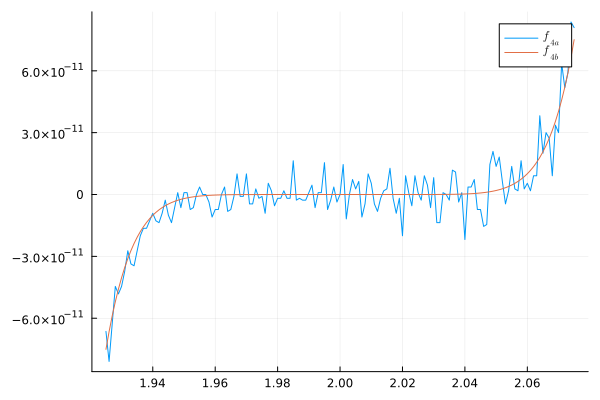

In [15]:
using Plots, LaTeXStrings
function f4a(x)
    return x^9 - 18*x^8 + 144*x^7 - 672*x^6 + 2016*x^5 - 4032*x^4 + 5376*x^3 - 4608*x^2 + 2304*x - 512
end

function f4b(x)
    return (x - 2)^9
end

r = 1.925:0.001:2.075
plot(
    r,
    [f4a(x) for x in r],
    label = L"f_{4a}"
)
plot!(
    r,
    [f4b(x) for x in r],
    label = L"f_{4b}"   
)

e) Determine $\lim_{x\rightarrow 0}\kappa_{f_5}(0)$. Plot $f_5$ in julia in the interval $[-5 \cdot 10^{-8},5\cdot  10^{-8}]$. Reformulate $f_5$ and obtain a more accurate plot. 
\begin{align*}
\\
\kappa_{f_5} &= |f_5^{'}(x)|\frac{|x|}{|f_5(x)|} = \left|\frac{2}{(1 + 2x)^2} - \frac{2}{(1 + x)^2}\right|\frac{|x|}{\left|\frac{1}{1 + 2x} - \frac{1 - x}{1 + x}\right|} \\
\\
\lim_{x \rightarrow 0}{\kappa_{f_5}} &= \lim_{x \rightarrow 0}{\frac{3x + 2}{(1 + x)(1 + 2x)}} = \frac{2}{1} = 2 
\end{align*}

Refromulation
\begin{align*}
\\
f_5(x) &= \frac{1}{1+2x}-\frac{1-x}{1+x} = \frac{1 + x - (1 - x)(1 + 2x)}{(1 + 2x)(1 + x)} = \frac{1 + x - 1 - 2x + x + 2x^2}{(1 + 2x)(1 + x)} = \frac{2x^2}{(1 + 2x)(1 + x)}
\end{align*}

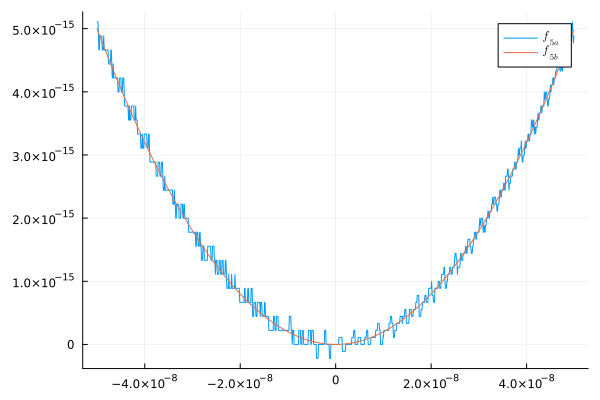

In [16]:
function f5a(x)
    return 1/(1 + 2x) - (1 - x)/(1 + x)
end

function f5b(x)
    return 2*x^2 / ((1 + 2*x) * (1 + x))
end

r = -5*10^-8:10^-10:5*10^-8
plot(
    r,
    [f5a(x) for x in r],
    label = L"f_{5a}"
)
plot!(
    r,
    [f5b(x) for x in r],
    label = L"f_{5b}"
)